In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score, make_scorer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisingcsv/Advertising.csv


**COLLECTION OF DATA**

In [38]:
sales=pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")

In [39]:
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [40]:
sales.shape

(200, 5)

In [41]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [42]:
sales.drop(columns=['Unnamed: 0'],inplace = True)

In [43]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**SCATTERPLOT**

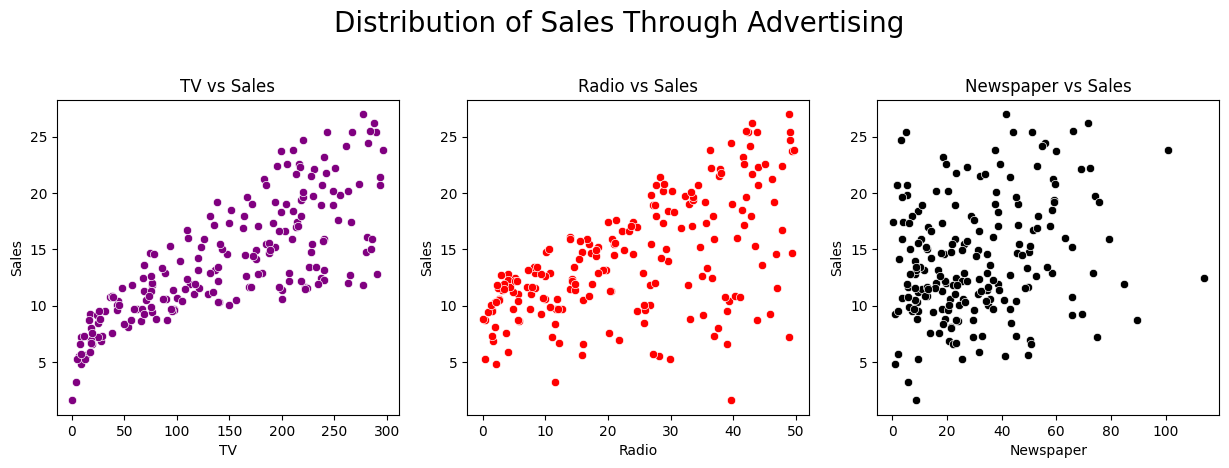

In [44]:
# Individual Scatter Plots
plt.rcParams['figure.figsize'] = (15,9)

plt.subplot(2,3,1)
sns.scatterplot(data=sales, x='TV', y='Sales',color='purple')
plt.title('TV vs Sales')


plt.subplot(2,3,2)
sns.scatterplot(data=sales, x='Radio', y='Sales',color='red')
plt.title('Radio vs Sales')


plt.subplot(2,3,3)
sns.scatterplot(data=sales, x='Newspaper', y='Sales',color='black')
plt.title('Newspaper vs Sales')

plt.suptitle("Distribution of Sales Through Advertising",fontsize=20)
plt.show();

**BOXPLOT**

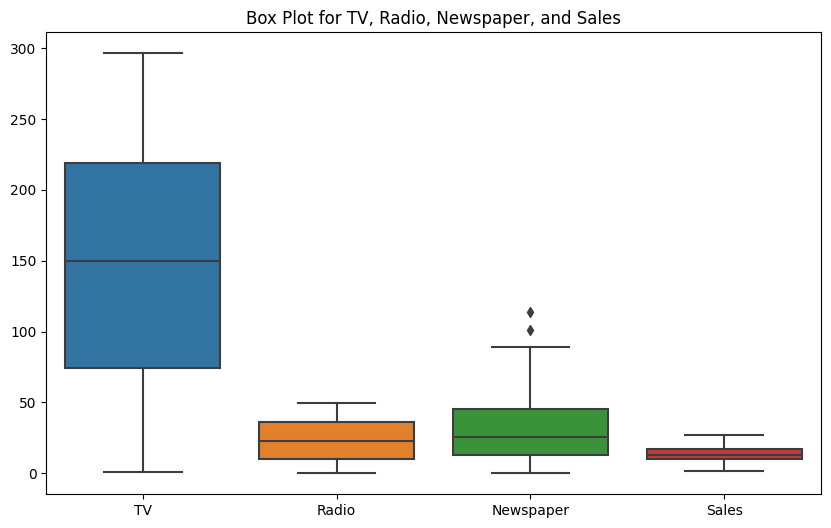

In [45]:
# Box Plots
plt.figure(figsize=(10,6))
sns.boxplot(data=sales[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.title('Box Plot for TV, Radio, Newspaper, and Sales')
plt.show()
     


**HISTOGRAM**

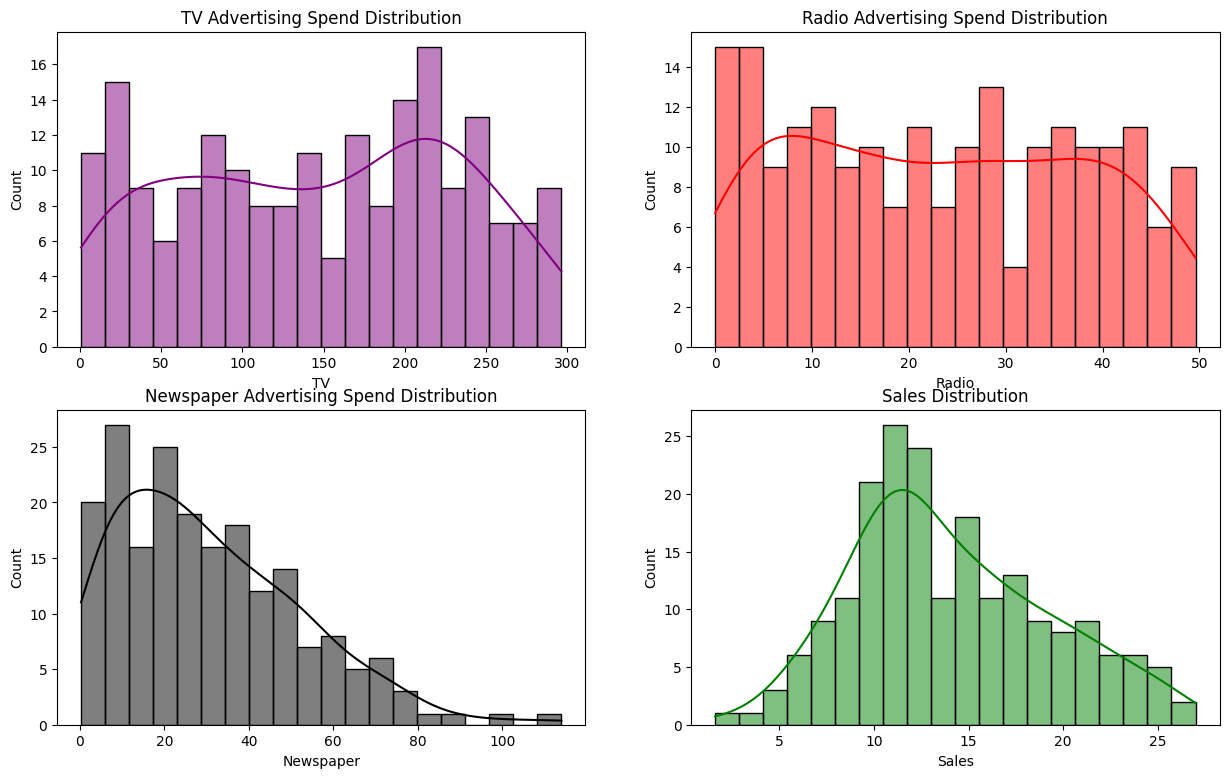

In [46]:
# Histograms
plt.rcParams['figure.figsize'] = (15,9)

plt.subplot(2,2,1)
sns.histplot(data=sales['TV'], kde=True,color='purple',bins=20)
plt.title('TV Advertising Spend Distribution')

plt.subplot(2,2,2)
sns.histplot(data=sales['Radio'], kde=True,color='red',bins=20)
plt.title('Radio Advertising Spend Distribution')

plt.subplot(2,2,3)
sns.histplot(data=sales['Newspaper'], kde=True,color='black',bins=20)
plt.title('Newspaper Advertising Spend Distribution')

plt.subplot(2,2,4)
sns.histplot(data=sales['Sales'], kde=True,color='green',bins=20)
plt.title('Sales Distribution')


plt.show();
     


**PAIR PLOT**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


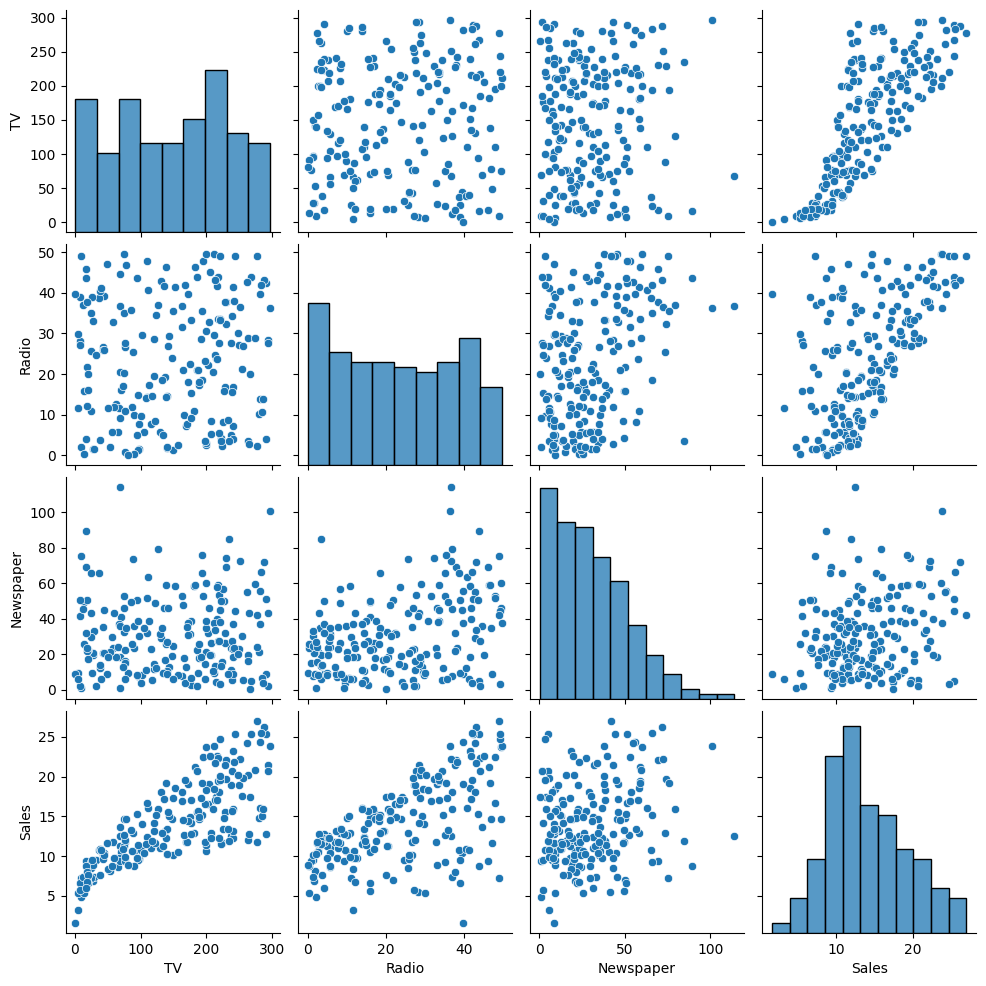

In [47]:
#SCATTER PLOT MATRIX
sns.pairplot(sales,vars=['TV','Radio','Newspaper','Sales'])
plt.show()

**ORRELATION HEATMAP**

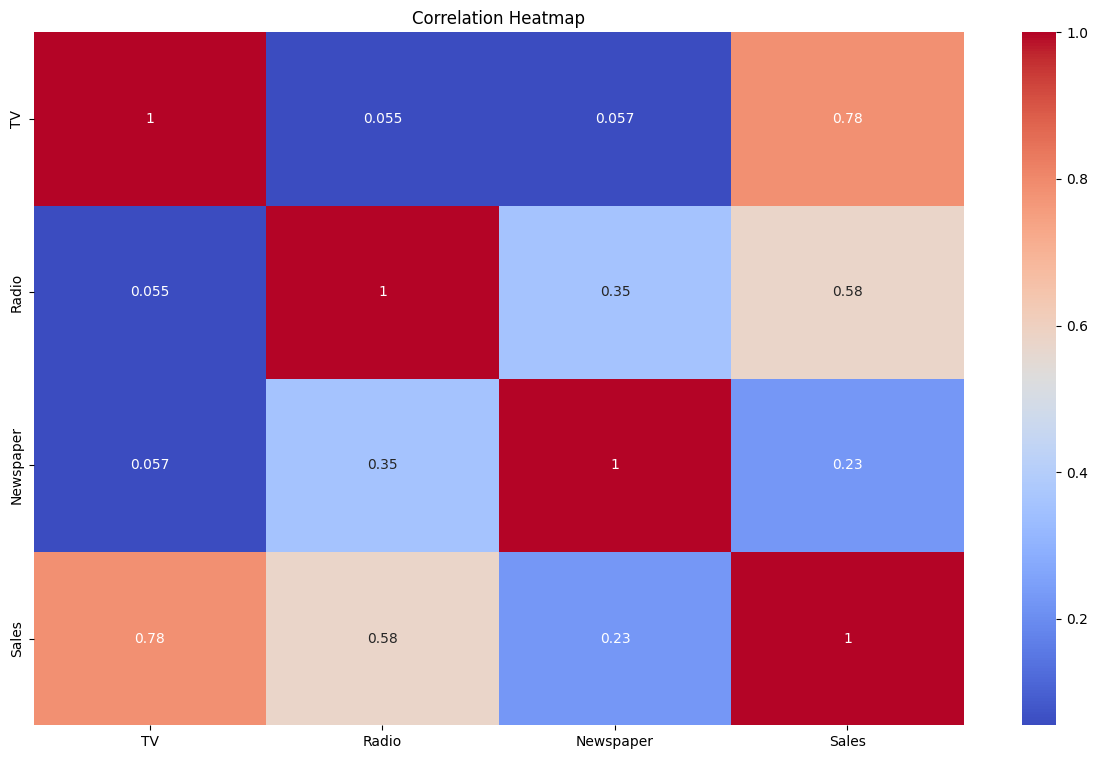

In [48]:
#correaltion heatmap
correlation_matrix= sales[['TV','Radio','Newspaper','Sales']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

MODEL TRAINING

In [49]:
X = sales.drop(columns=['Sales'])
y = sales['Sales']

print("Shape of X:",X.shape)
print("Shape of y:",y.shape)
     

Shape of X: (200, 3)
Shape of y: (200,)


In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)


In [51]:
#shape of X_train,X_test,y_train,y_test
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train: (160, 3)
Shape of X_test: (40, 3)
Shape of y_train: (160,)
Shape of y_test (40,)


In [52]:
lr = LinearRegression()

In [53]:
lr.fit(X_train,y_train)

LinearRegression()

**MODEL EVALUTION**

In [54]:
y_pred_lr = lr.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
     

Mean Squared Error: 4.503125945046126
R-squared: 0.7575894500772719


In [65]:
from sklearn.model_selection import learning_curve
import numpy as np
def plot_learning_curve(estimator, X, y, train_sizes, cv, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Score', color='b')
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color='b'
    )
    plt.plot(train_sizes, test_scores_mean, label='Testing Score', color='g')
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color='g'
    )
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.show();

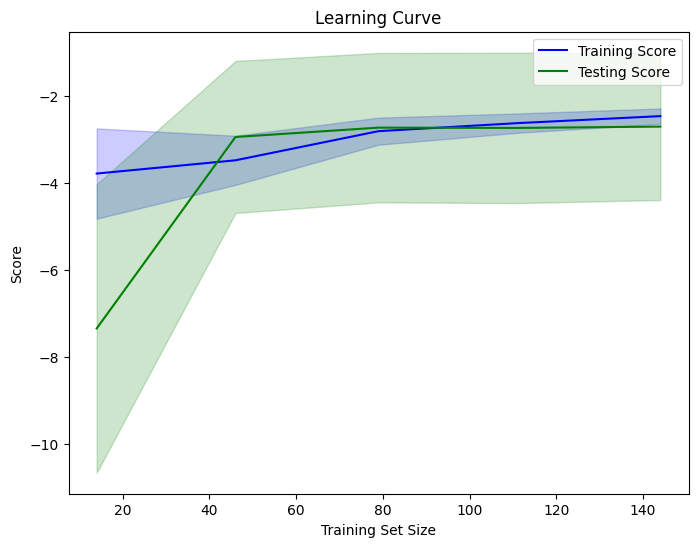

In [66]:
train_sizes = np.linspace(0.1, 1.0, 5)  # Example: 5 equally spaced training set sizes
plot_learning_curve(lr, X_train, y_train, train_sizes=train_sizes, cv=10)

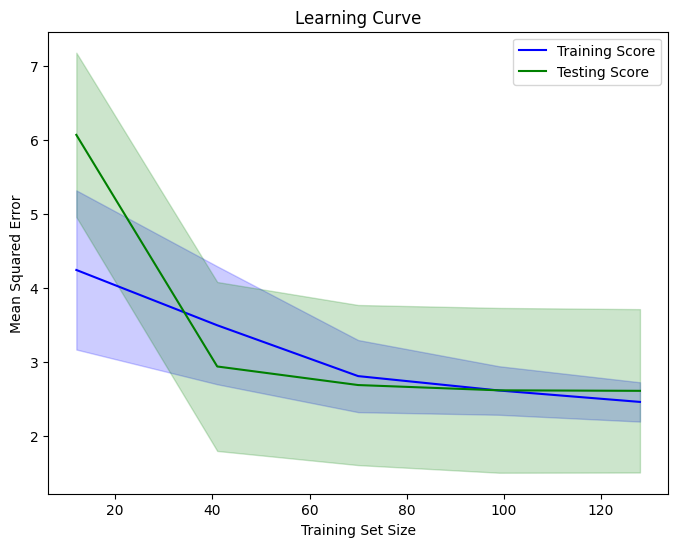

In [67]:
# Create a scorer for the learning curve function (negative mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    lr, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring=scorer
)

# Calculate mean and standard deviation of scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = -np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = -np.std(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='b')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='b')
plt.plot(train_sizes, test_scores_mean, label='Testing Score', color='g')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [71]:
# Step 8: Prediction (for new data)
new_data = pd.DataFrame({
    'TV': [230.1],
    'Radio': [37.8],
    'Newspaper': [69.2]
})
predicted_sales = lr.predict(new_data)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 20.821518379883894
